In [1]:
import random
import numpy
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import matplotlib.pyplot as plt

from deap import benchmarks

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0, -1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_area", random.uniform, 80, 200)
toolbox.register("attr_price", random.uniform, 80, 1000)
# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual, 
    (toolbox.attr_area, toolbox.attr_price), 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
def my_evaluate(individual):
    return individual[0], individual[1],

In [5]:
def my_crossover(ind1, ind2):
    '''
    ind1[0] = ind2[0]
    ind2[1] = ind1[1]
    '''
    return ind1, ind2

In [6]:
def my_mutation(ind):
    '''
    if random.random() < 0.5:
        
        ind[0] = random.randint(80,200)
    else:
        ind[1] = random.randint(80,1000)
    ''' 
    return ind,

In [7]:
toolbox.register("evaluate", my_evaluate)
toolbox.register("mate", my_crossover)
toolbox.register("mutate", my_mutation)
toolbox.register("select", tools.selNSGA2)

In [8]:
def main():
    random.seed(64)
    
    NGEN = 500
    MU = 1000
    LAMBDA = 100
    CXPB = 0.7
    MUTPB = 0.2
    
    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean, axis=0)
    stats.register("std", numpy.std, axis=0)
    stats.register("min", numpy.min, axis=0)
    stats.register("max", numpy.max, axis=0)
    
    algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                              halloffame=hof, verbose=False)
    
    return pop, stats, hof

In [9]:
def plot_pareto(population):
    
    x_values = []
    y_values = []
    
    for individual in population:
        fitnesses = toolbox.evaluate(individual)
        
        x_values.append(fitnesses[0])
        y_values.append(fitnesses[1])
    
    
    plt.plot(x_values, y_values, '.')
    #plt.yscale('log')
    plt.ylabel('Preço')
    plt.xlabel('Area')
    plt.show()

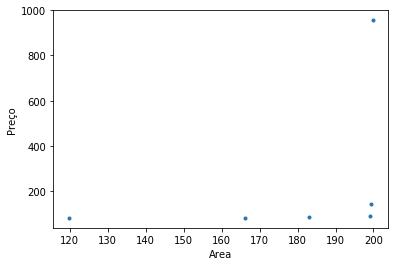

[[199.84933892642553, 955.6669501700992], [199.43335044042016, 142.78855971850726], [198.9823862448048, 89.35616888806878], [182.93804117842703, 82.95951440728243], [166.23583732784954, 82.38815846500073], [119.68551773229817, 80.56130353564303]]


In [10]:
if __name__ == "__main__":
    results = main()
    
    #print(results[2])
    
    plot_pareto(results[2])
    print(results[2])
    